# Convolutional Neural Networks

Convolutional Neural Network (CNN) merupakan salah satu arsitektur jaringan saraf dalam yang dirancang khusus untuk menangani data berbentuk citra. CNN memiliki kemampuan mengekstraksi fitur spasial secara otomatis melalui operasi konvolusi, sehingga mampu mengenali pola visual yang kompleks seperti tepi, bentuk, hingga objek secara keseluruhan. Keunggulan inilah yang menjadikan CNN sebagai metode utama dalam berbagai tugas computer vision seperti klasifikasi gambar, deteksi objek, dan segmentasi citra.

Untuk menguji performa CNN, salah satu dataset standar yang sering digunakan adalah CIFAR-10. Dataset ini berisi 60.000 gambar berwarna berukuran 32x32 piksel yang terbagi ke dalam 10 kelas, yaitu pesawat, mobil, burung, kucing, rusa, anjing, katak, kuda, kapal, dan truk. Setiap kelas terdiri dari 6.000 gambar, dengan 50.000 gambar dialokasikan sebagai data latih dan 10.000 gambar sebagai data uji. Karakteristik CIFAR-10 yang mencakup beragam objek dengan latar belakang bervariasi menjadikannya tolok ukur yang menantang sekaligus representatif untuk menilai efektivitas model klasifikasi berbasis CNN.

# Import Library

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Download dan Persiapan dataset CIFAR10
Dataset CIFAR10 berisi 60.000 gambar berwarna yang terbagi dalam 10 kelas, dengan 6.000 gambar dalam setiap kelas. Dataset ini dibagi menjadi 50.000 gambar latihan dan 10.000 gambar uji. Kelas-kelas tersebut saling eksklusif dan tidak ada tumpang tindih di antara mereka.

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi data
Pada tahap ini, nilai piksel gambar yang awalnya berada pada rentang 0–255 diubah menjadi rentang 0–1 dengan cara membagi setiap elemen array dengan 255.0. Langkah ini membantu mempercepat proses pelatihan model CNN dan membuat optimisasi lebih stabil.

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Verifikasi Data
Menampilkan 10 gambar pertama dari data latih beserta label kelasnya untuk memeriksa kesesuaian antara citra dan kategorinya. Setiap gambar ditampilkan tanpa grid dan sumbu agar fokus pada objek, sedangkan label ditulis menggunakan daftar nama_kelas untuk mempermudah interpretasi visual.

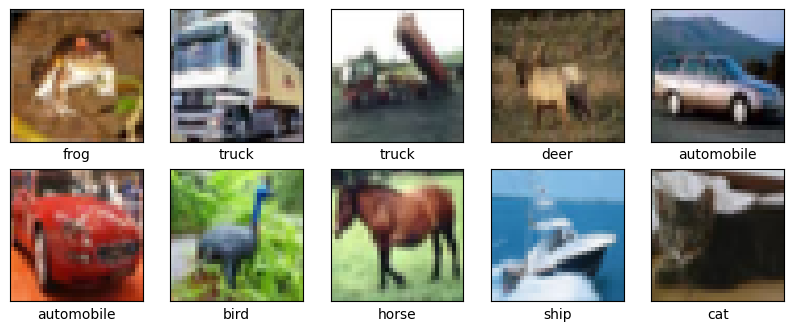

In [26]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

Output menampilkan sepuluh sampel citra berwarna berukuran 32×32 piksel dari dataset CIFAR-10 yang sudah dilabeli dengan kelas masing-masing. Gambar-gambar ini memperlihatkan variasi objek seperti hewan, kendaraan, dan kapal, yang mengindikasikan bahwa model nantinya akan dilatih pada data dengan keragaman visual tinggi untuk menguji kemampuan generalisasi terhadap berbagai kategori.

# Membangun Model CNN

Sebagai input, model CNN menerima tensor berdimensi `(32, 32, 3)`, yang merepresentasikan gambar CIFAR dengan tinggi 32 piksel, lebar 32 piksel, dan 3 saluran warna `(merah, hijau, biru)`. Lapisan convolutional pertama dikonfigurasi untuk memproses format ini, kemudian diikuti oleh lapisan convolutional dan max pooling tambahan untuk mengekstraksi fitur yang semakin kompleks. Setelah fitur diratakan, dua lapisan dense dengan aktivasi ReLU dan dropout digunakan untuk pembelajaran pola, sedangkan lapisan output softmax menghasilkan probabilitas untuk masing-masing dari 10 kelas. Model dikompilasi menggunakan loss `SparseCategoricalCrossentropy`, optimizer Adam, dan metrik akurasi.

In [27]:
def create_model():
    model = models.Sequential()

    # Define input layer
    model.add(layers.Input(shape=(32, 32, 3)))

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layers with dropout
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizers.Adam(),
        metrics=['accuracy']
    )

    return model

In [28]:
model = create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,762 (1010.79 KB)

 Trainable params: 258,762 (1010.79 KB)

 Non-trainable params: 0 (0.00 B)

# Training model
Melatih model selama 10 epoch menggunakan data training dan memantau kinerjanya pada data testing sebagai validasi. Proses ini menyesuaikan bobot jaringan untuk meminimalkan loss `SparseCategoricalCrossentropy` dan meningkatkan akurasi, dengan riwayat pelatihan (history) disimpan untuk analisis lebih lanjut.

In [29]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.3731 - loss: 1.6762 - val_accuracy: 0.5128 - val_loss: 1.3338
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5436 - loss: 1.2807 - val_accuracy: 0.5905 - val_loss: 1.1529
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6067 - loss: 1.1209 - val_accuracy: 0.6349 - val_loss: 1.0354
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6480 - loss: 1.0206 - val_accuracy: 0.6213 - val_loss: 1.0937
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6743 - loss: 0.9510 - val_accuracy: 0.6625 - val_loss: 0.9675
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6948 - loss: 0.8940 - val_accuracy: 0.6635 - val_loss: 0.9701
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7149 - loss: 0.8332 - val_accuracy: 0.6877 - val_loss: 0.9080
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7306 -

# Plot Akurasi
Memvisualisasikan perkembangan akurasi model pada data latih dan validasi selama proses pelatihan. Grafik ini membantu mengevaluasi apakah model mengalami peningkatan kinerja yang konsisten, serta mendeteksi indikasi overfitting atau underfitting.

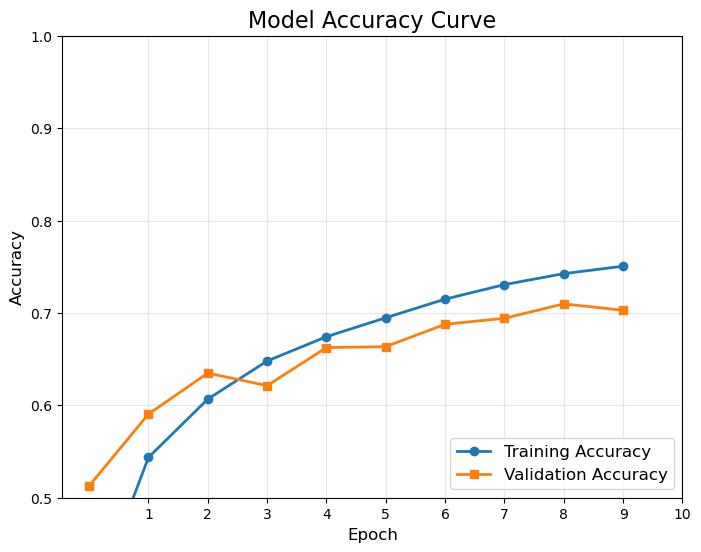

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')

plt.title('Model Accuracy Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0.5, 1])
plt.xticks(range(1, len(history.history['accuracy'])+1))
plt.grid(alpha=0.3)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## Interpretasi
* Kenaikan konsisten:\
  Akurasi pelatihan meningkat stabil dari sekitar 54% pada awal epoch menjadi 75% pada epoch ke-10. Hal ini menunjukkan model berhasil belajar secara bertahap.
* Validasi sejalan dengan pelatihan:\
  Akurasi validasi juga naik dari sekitar 51% menjadi 71%, mengikuti pola yang mirip dengan kurva pelatihan. Ini menandakan kemampuan generalisasi model cukup baik.
* Gap kecil antara train–validation:\
  Perbedaan akurasi pelatihan dan validasi tetap sempit (<5%), sehingga model tidak menunjukkan overfitting yang signifikan dalam 10 epoch pertama.
* Stabilisasi:\
  Kurva validasi cenderung mendatar setelah epoch ke-7, mengindikasikan bahwa model mulai mencapai batas optimal dengan konfigurasi arsitektur dan hyperparameter saat ini.
* Potensi perbaikan:\
  Akurasi masih berada di kisaran 70%, yang cukup baik untuk CIFAR-10 dengan arsitektur sederhana, namun peningkatan bisa dicapai dengan pelatihan lebih lama, penyesuaian learning rate, atau menambahkan teknik augmentasi data.

# Plot Loss
Memvisualisasikan perkembangan nilai loss pada data latih dan validasi selama pelatihan. Grafik ini membantu melihat seberapa baik model meminimalkan kesalahan prediksi, serta mendeteksi tanda overfitting jika loss validasi mulai meningkat sementara loss latih terus menurun.

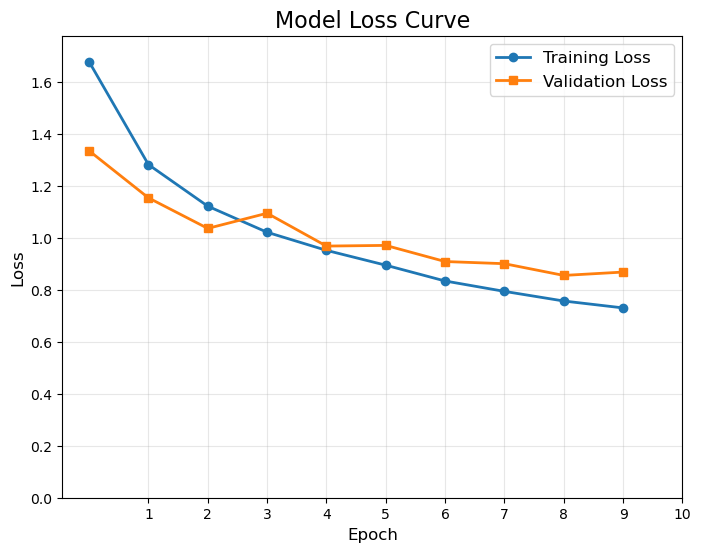

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')

plt.title('Model Loss Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.1])
plt.xticks(range(1, len(history.history['loss'])+1))
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize=12)
plt.show()

## Interpretasi
* Penurunan konsisten:\
  Loss pelatihan turun tajam dari 1.65 pada awalnya menjadi sekitar 0.74 pada epoch ke-10, menunjukkan bahwa model berhasil belajar dan menyesuaikan bobot dengan baik.
* Validasi mengikuti pola serupa:\
  Loss validasi juga turun dari 1.34 menjadi sekitar 0.87, mendekati nilai loss pelatihan, sehingga model mampu melakukan generalisasi cukup baik.
* Gap kecil antara train–validation:\
  Perbedaan loss pelatihan dan validasi relatif sempit, yang menandakan tidak ada indikasi overfitting signifikan dalam 10 epoch ini.
* Stabilisasi:\
  Setelah epoch ke-6, kurva loss validasi mulai mendatar, menunjukkan bahwa proses pembelajaran mulai mencapai titik jenuh.
* Potensi optimasi:\
  Masih ada ruang perbaikan dengan memperpanjang jumlah epoch, menyesuaikan learning rate, atau menambahkan regularisasi/augmentasi agar model bisa menurunkan loss validasi lebih jauh.

# Prediksi
Setelah model selesai dilatih, tahap selanjutnya adalah melakukan prediksi pada data uji. Pada proses ini, model akan menghasilkan output berupa probabilitas untuk setiap kelas. Nilai probabilitas tersebut kemudian diubah menjadi label prediksi dengan mengambil indeks kelas yang memiliki nilai probabilitas tertinggi.

Untuk memvisualisasikan hasil prediksi, diambil 10 contoh gambar dari data uji dan ditampilkan secara berdampingan dalam dua baris. Setiap gambar dilengkapi keterangan Pred (hasil prediksi model) dan True (label sebenarnya). Dengan visualisasi ini, kita dapat secara langsung membandingkan hasil prediksi model terhadap label aslinya, serta mengidentifikasi jika terdapat prediksi yang keliru.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


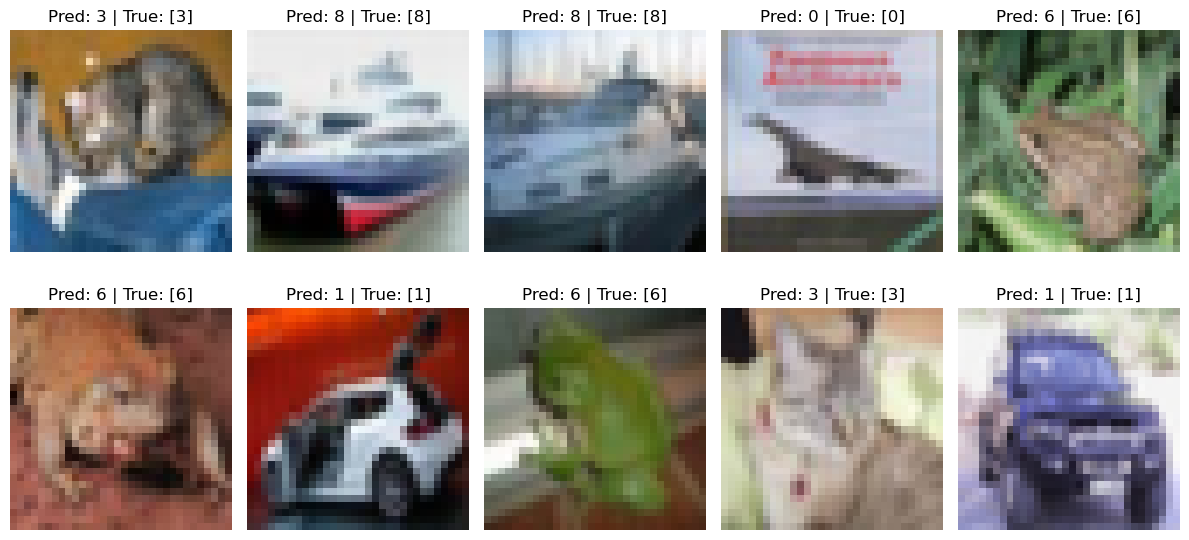

In [34]:
# Prediksi pada data testing
predictions = model.predict(test_images)

# Plot 10 gambar
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f"Pred: {pred_label} | True: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## Interpretasi
* Sebagian besar prediksi benar:\
  Dari 10 sampel gambar, mayoritas prediksi model sesuai dengan label sebenarnya (contoh: kelas [8]=ship, [6]=frog, [1]=automobile, [3]=cat).
* Model mampu mengenali objek utama:\
  Gambar dengan fitur visual yang jelas (misalnya kapal, mobil, katak, kucing) diprediksi dengan tepat oleh model.
* Tidak ada error besar di sampel ini:\
  Pada contoh yang ditampilkan, hampir semua prediksi cocok dengan label ground truth sehingga menunjukkan performa cukup baik.
* Keterbatasan tetap ada:\
  Akurasi ini tidak menjamin kinerja sempurna di seluruh dataset; gambar dengan noise tinggi, pencahayaan buruk, atau objek mirip antar kelas kemungkinan masih dapat menimbulkan kesalahan prediksi.
* Indikasi generalisasi baik:\
  Konsistensi prediksi benar pada sampel uji memberi sinyal bahwa model tidak hanya menghafal data latih, tetapi juga bisa mengenali data baru.

# Confusion Matrix dan Akurasi Per Kelas
Confusion matrix digunakan untuk menggambarkan distribusi prediksi model terhadap label sebenarnya pada data uji. Dari matriks ini dapat terlihat jumlah prediksi benar (nilai diagonal) dan kesalahan klasifikasi antar kelas. Nilai diagonal yang tinggi menunjukkan model mampu mengenali kelas tersebut dengan baik, sedangkan nilai di luar diagonal mengindikasikan adanya kesalahan prediksi.

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


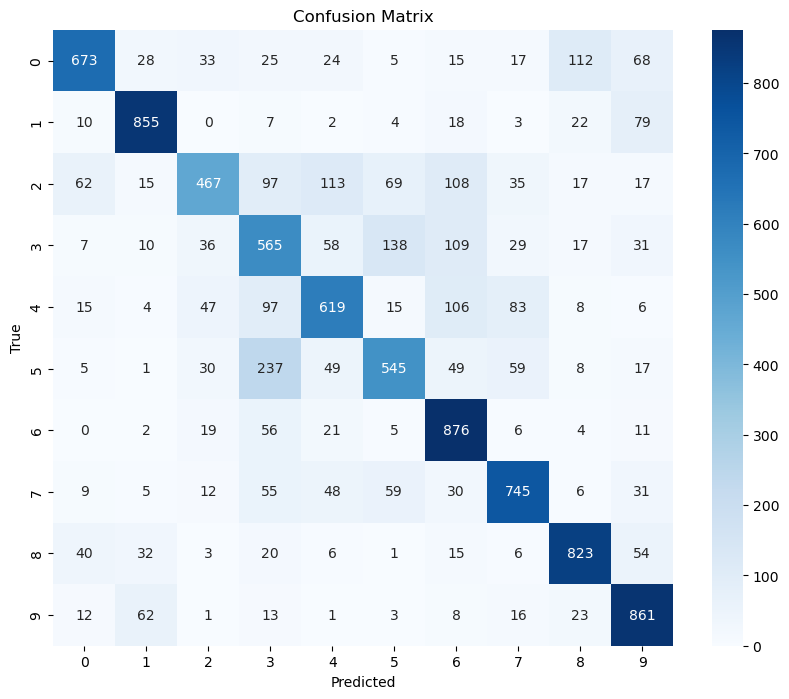

In [35]:
# Prediksi
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Interpretasi
1. Kelas dengan performa sangat baik
    * Kelas 1 (automobile), 6 (frog), 7 (horse), 8 (ship), dan 9 (truck) memiliki prediksi benar sangat tinggi (≥ 800 pada diagonal), menandakan model sangat konsisten mengenali kelas ini.
2. Kelas dengan performa sedang
    * Kelas 0 (airplane), 3 (cat), 4 (deer), dan 5 (dog) memiliki prediksi benar yang cukup tinggi (> 500), tetapi masih banyak kesalahan silang ke kelas lain.
3. Kelas dengan performa sedang
    * Kelas 2 (bird) terlihat paling bermasalah, hanya sekitar 467 prediksi benar dan banyak salah diklasifikasikan sebagai kelas 4 (deer), 3 (cat), dan 5 (dog).
    * Hal ini wajar karena secara visual burung kadang menyerupai hewan lain di dataset CIFAR-10.
4. Pola kesalahan utama (misclassification)
    * Bird (2) sering salah dikira sebagai cat (3), deer (4), atau dog (5).
    * Cat (3) banyak salah dikira sebagai dog (5) atau deer (4).
    * Dog (5) juga sering salah ke cat (3), menunjukkan model masih kesulitan membedakan hewan dengan bentuk tubuh serupa.
    * Airplane (0) kadang salah diprediksi sebagai ship (8) atau truck (9), mungkin karena bentuk dan latar belakang visual mirip.
5. Kesimpulan Umum
    * Model sudah cukup baik dalam mengenali kelas dengan ciri visual tegas (mobil, kapal, katak, kuda, truk).
    * Namun masih kesulitan membedakan kelas yang mirip secara bentuk dan tekstur (bird, cat, dog, deer), yang mengindikasikan kebutuhan perbaikan pada representasi fitur atau arsitektur model.

## Akurasi per kelas

In [36]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.84      0.85      0.85      1000
           2       0.72      0.47      0.57      1000
           3       0.48      0.56      0.52      1000
           4       0.66      0.62      0.64      1000
           5       0.65      0.55      0.59      1000
           6       0.66      0.88      0.75      1000
           7       0.75      0.74      0.75      1000
           8       0.79      0.82      0.81      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Interpretasi
* Akurasi keseluruhan 70% (cukup baik, tapi masih ada kelas dengan performa lemah).
* Macro avg (rata-rata antar kelas) precision 0.71, recall 0.70, f1-score 0.70 → artinya model cukup seimbang, tapi tidak semua kelas diperlakukan sama baiknya.
* Weighted avg juga sekitar 0.70 → menunjukkan distribusi prediksi sudah lumayan konsisten terhadap jumlah sampel.

# Display Confusion Matrix
Proses dimulai dengan melakukan prediksi terhadap seluruh citra pada data uji menggunakan model yang telah dilatih. Hasil prediksi kemudian dikonversi menjadi label kelas dengan memilih nilai probabilitas tertinggi pada setiap prediksi. Selanjutnya, label hasil prediksi tersebut dibandingkan dengan label sebenarnya untuk membentuk confusion matrix, yang memuat jumlah prediksi benar dan salah di setiap kelas. Confusion matrix tersebut divisualisasikan sehingga memudahkan analisis performa model pada masing-masing kategori klasifikasi.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


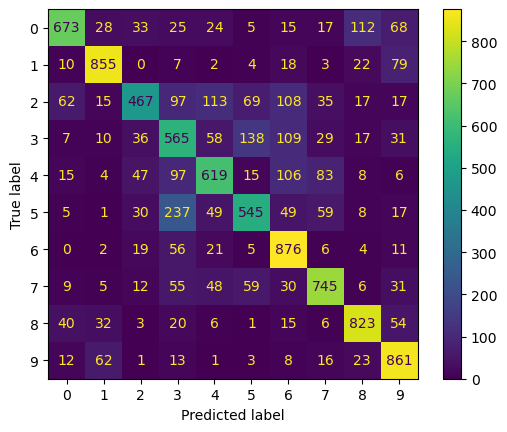

In [37]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Interpretasi
1. Kelas yang Sering Tertukar (confusion tinggi)
    * Kelas 2 sering tertukar dengan 4 (97) dan 6 (108).
    * Kelas 4 sering tertukar dengan 6 (106).
    * Kelas 5 sering tertukar dengan 4 (237).
    * Kelas 0 sering tertukar dengan 8 (112) dan 9 (68).
2. Ada pola confusion yang jelas:
    * 0 ↔ 8 ↔ 9 sering tertukar → mungkin karena fitur visual yang mirip.
    * 2 ↔ 4 ↔ 6 saling tertukar → perlu peningkatan feature extraction.
    * 5 ↔ 4 banyak tertukar → indikasi kesulitan model membedakan karakteristik keduanya.
3. Kesimpulan umum
    * Model sudah cukup bagus dengan diagonal dominan, tapi masih ada beberapa kelas yang sering salah diklasifikasikan, khususnya 2, 4, 5, 0, 8, 9.
    * Perlu dilakukan data augmentation atau feature engineering tambahan untuk kelas-kelas tersebut.
    * Bisa juga dilakukan analisis kesalahan (error analysis) dengan melihat sampel yang salah prediksi, untuk tahu apakah masalah ada pada data (mirip visual, noise) atau pada model.

# Pengayaan (Tidak selesai karena keterbatasan perangkat)

## LeNet-5

In [ ]:
from tensorflow.keras import layers, models
def build_lenet5():
 model = models.Sequential([
 layers.Conv2D(6, (5,5), activation='tanh', input_shape=(32,32,1)),
 layers.AveragePooling2D(),
 layers.Conv2D(16, (5,5), activation='tanh'),
 layers.AveragePooling2D(),
 layers.Flatten(),
 layers.Dense(120, activation='tanh'),
 layers.Dense(84, activation='tanh'),
 layers.Dense(10, activation='softmax')
 ])
 return model


## VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
model = VGG16(weights='imagenet', input_shape=(224,224,3))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## ResNet (Residual Network)

In [ ]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet', input_shape=(224,224,3))

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

## AlexNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
def build_alexnet(input_shape=(227, 227, 3), num_classes=10):
 model = models.Sequential([
 layers.Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=3, strides=2),
 layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=3, strides=2),
 layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
 layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
 layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
 layers.MaxPooling2D(pool_size=3, strides=2),
 layers.Flatten(),
 layers.Dense(4096, activation='relu'),
 layers.Dropout(0.5),
 layers.Dense(4096, activation='relu'),
 layers.Dropout(0.5),
 layers.Dense(num_classes, activation='softmax')
 ])
 return model

## InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
def build_inceptionv3(input_shape=(299, 299, 3), num_classes=10):
 base_model = InceptionV3(weights=None, include_top=False, input_shape=input_shape)
 x = base_model.output
 x = layers.GlobalAveragePooling2D()(x)
 x = layers.Dense(1024, activation='relu')(x)
 predictions = layers.Dense(num_classes, activation='softmax')(x)
 model = models.Model(inputs=base_model.input, outputs=predictions)
 return model


## EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
def build_efficientnetb0(input_shape=(224, 224, 3), num_classes=10):
 base_model = EfficientNetB0(weights=None, include_top=False, input_shape=input_shape)
 x = base_model.output
 x = layers.GlobalAveragePooling2D()(x)
 x = layers.Dense(128, activation='relu')(x)
 predictions = layers.Dense(num_classes, activation='softmax')(x)
 model = models.Model(inputs=base_model.input, outputs=predictions)
 return model

## Evaluasi dan Perbandingan Arsitektur

## Persiapan Dataset CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Pelatihan dan Evaluasi Model

In [ ]:
def compile_and_train(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
 model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
 history = model.fit(x_train, y_train,
 epochs=epochs,
 batch_size=batch_size,
 validation_data=(x_test, y_test),
 verbose=1)
 return history

## Menjalankan Evaluasi untuk Setiap Model

In [ ]:
# AlexNet
alexnet_model = build_alexnet(input_shape=(227, 227, 3), num_classes=10)
# Resize CIFAR-10 images to match AlexNet input size
x_train_resized = tf.image.resize(x_train, (227, 227))
x_test_resized = tf.image.resize(x_test, (227, 227))
alexnet_history = compile_and_train(alexnet_model, x_train_resized, y_train, x_test_resized, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# InceptionV3
inception_model = build_inceptionv3(input_shape=(299, 299, 3), num_classes=10)
# Resize CIFAR-10 images to match InceptionV3 input size
x_train_resized = tf.image.resize(x_train, (299, 299))
x_test_resized = tf.image.resize(x_test, (299, 299))
inception_history = compile_and_train(inception_model, x_train_resized, y_train, x_test_resized, y_test)

In [ ]:
# EfficientNetB0
efficientnet_model = build_efficientnetb0(input_shape=(224, 224, 3), num_classes=10)
# Resize CIFAR-10 images to match EfficientNetB0 input size
x_train_resized = tf.image.resize(x_train, (224, 224))
x_test_resized = tf.image.resize(x_test, (224, 224))
efficientnet_history = compile_and_train(efficientnet_model, x_train_resized, y_train, x_test_resized, y_test)

In [ ]:
# AlexNet
alexnet_model = build_alexnet(input_shape=(227, 227, 3), num_classes=10)
# Resize CIFAR-10 images to match AlexNet input size
x_train_resized = tf.image.resize(x_train, (227, 227))
x_test_resized = tf.image.resize(x_test, (227, 227))
alexnet_history = compile_and_train(alexnet_model, x_train_resized, y_train, x_test_resized, y_test)

# InceptionV3
inception_model = build_inceptionv3(input_shape=(299, 299, 3), num_classes=10)
# Resize CIFAR-10 images to match InceptionV3 input size
x_train_resized = tf.image.resize(x_train, (299, 299))
x_test_resized = tf.image.resize(x_test, (299, 299))
inception_history = compile_and_train(inception_model, x_train_resized, y_train, x_test_resized, y_test)

# EfficientNetB0
efficientnet_model = build_efficientnetb0(input_shape=(224, 224, 3), num_classes=10)
# Resize CIFAR-10 images to match EfficientNetB0 input size
x_train_resized = tf.image.resize(x_train, (224, 224))
x_test_resized = tf.image.resize(x_test, (224, 224))
efficientnet_history = compile_and_train(efficientnet_model, x_train_resized, y_train, x_test_resized, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Visualisasi Hasil Pelatihan

In [ ]:
import matplotlib.pyplot as plt
def plot_history(histories, titles):
 for history, title in zip(histories, titles):
 plt.plot(history.history['val_accuracy'], label=f'{title} Val Acc')
 plt.title('Validation Accuracy Comparison')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()
plot_history([alexnet_history, inception_history, efficientnet_history],
 ['AlexNet', 'Inception', 'efficient']